# ID-AI-0019
## Submission Date: 11.01.2018

# Abstract

"House Prices: Advanced Regression Techniques"
This Project represents House Price prediction using ANN With 79 explanatory variables describing (almost) every aspect of 
residential homes in Ames, Iowa, this project challenges is  to predict the final price of each home. To predict the house price, the approach was several segments such as Data Analysis, Data Preprocessing, create Model, Hyperparatmeter tuning etc. The model was created by careful analysis of data visualization like data correlation, feature engineering, skewness reduction and other preprocessing to shape the model for the prediction. Final best score comes from Hyperparameter tuning.

# Purpose of the Assignment

The purpose of this Assignment is to predict the Sales Price for each house. The Assignment explicitly focuses
on the Machine Learning Approach to the prediction, Data Preprocessing, Data Cleansing, Missing Data
Handling, Outliers Detection and Dropping, Hyper Parameter Tuning and Accuracy Improvement.
The target of this project is to implement ANN and predict the prices of the houses using the given dataset. 
The way i tackled the problem is :
1.Analyze the dataset
2.Apply various preprossesing methods
3.Run MLPRegressor(ANN)

## Basic Feature Extraction

In [130]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn.neural_network import MLPRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import normalize
from PyNomaly import loop

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from pandas.plotting import scatter_matrix

%matplotlib inline

In [132]:
import sys

In [133]:
#Custom Metric Function for the competition.
def rmsle(y_pred, y_true): 
    """
    Compute the Root Mean Squared Log Error for hypthesis y_pred and targets y_true

    Args:
        y_pred - numpy array containing predictions with shape (n_samples, n_targets)
        y_true - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean())

In [134]:
#load the csv file(Both train & test)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


# 1. Data Analysis

In [135]:
#handling missing value in the dataset
data_na = (train.isnull().sum() / len(train)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : data_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


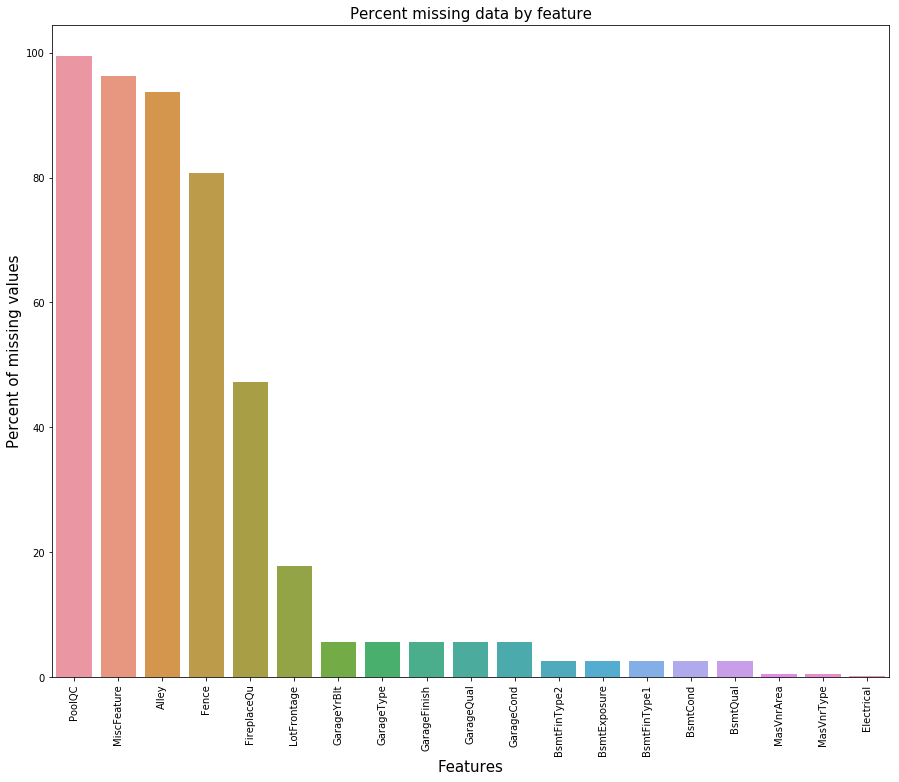

In [136]:
# visualization of missing data 
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [137]:
train.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

In [138]:
test.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         1



# Cell Report

1. To see the all parameter and their value 
2. It helps to visualize the data type and missing value
3. In the next step data will preprocess and fill by making a function.



# 2.Data Preprocessing

In [139]:
def dataPreprocess(df):
    df = df.fillna(df.mean())
    obj_data = df.loc[: , df.dtypes==object]
    Str_cols = obj_data.columns.tolist()
    for col in Str_cols:
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
    df['Age'] = df.YrSold - df.YearBuilt
    return df

# Cell Report

1. Now, I preprocess the data using fillna function by mean. 
2. Then I convert all the file types into object to avoid future type error. Then making a list parameter are string.
3. By using a for loop I have to convert category to numeric data.
4. After  that, I made a new colum 'Age' to find out the year difference.

In [140]:
train = dataPreprocess(train)
test = dataPreprocess(test)

In [141]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age
0,1461,20,2,80.0,11622,1,-1,3,3,0,...,0,-1,2,-1,0,6,2010,8,4,49
1,1462,20,3,81.0,14267,1,-1,0,3,0,...,0,-1,-1,0,12500,6,2010,8,4,52


## 2.1 Outlier Processing

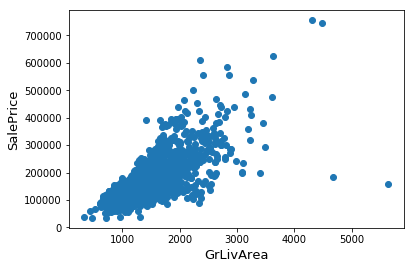

In [142]:
#Let's explore outliers wrt GrLivArea in the training dataset
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

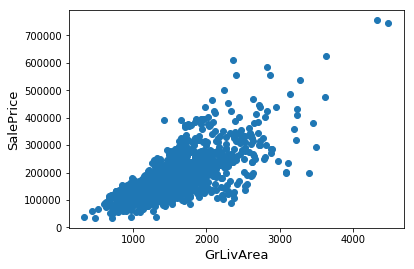

In [143]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the plot again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

# Cell Report

1. Documentation for the Ames Housing Data indicates that there are Outliers present in the Training Data.
2. In the first Scatter Plot, at the bottom right, there are two instances with extremely large GrLivArea(>4000)
   that are of a very low SalePrice of less than 300000. These are huge Oultliers. So, they were deleted.
3. There are probably other Outliers in the Training Data. However, removing all of them may badly affect the
   models if ever there were also Outliers in the Test Data. That's why , instead of removing them all, the models
   should be made robust on them.

## 2.2 Target Skewness


 mu = 180932.92 and sigma = 79467.79



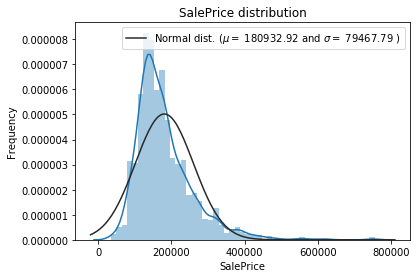

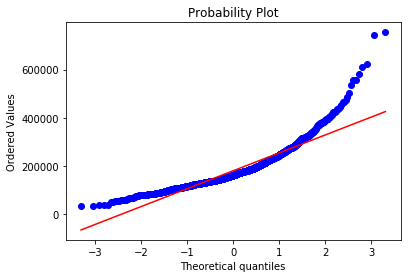

In [144]:
#SalePrice is the target variable we need to predict
#let's do some analysis on it
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



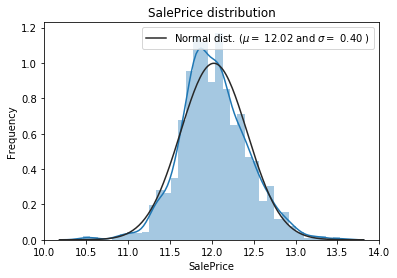

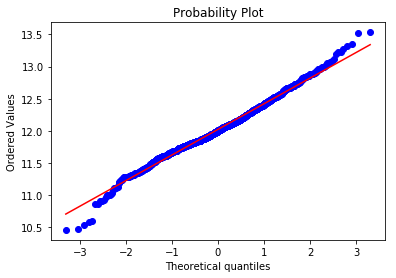

In [145]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()




# Cell Report

Most of the algorithms by default assume that the target follows a normal distribution. If that is not the case, then, the accuracy falls. In this section, we will take a look at the 'SalePrice' from a probabilistic viewpoint and transform it if necessary.

1. the left skewness is removed.Log Transformation was applied to the Target Variable because of its high skewness.

2. Log Transformation greatly reduced the Skewness of the Target Variable.

3. My target feature 'saleprice''s probability graph is in a straight line which will give me the good accuracy.

4. Skewness of the Target Variable was graphically represented and it was found to be right(positive) skewed.
   This is verified by the fact that the Mean of the Distribution is greater than the Mode.
   
   
   The Data now appears more Normally Distributed.


## 2.3 Data Correlation

In [146]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.821405
GrLivArea        0.725211
GarageCars       0.681033
GarageArea       0.656129
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
FireplaceQu      0.430091
Foundation       0.412203
BsmtFinSF1       0.392283
GarageCond       0.369805
GarageQual       0.353708
LotFrontage      0.352432
CentralAir       0.351598
WoodDeckSF       0.334251
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
PavedDrive       0.304682
Electrical       0.292385
LotArea          0.260544
SaleCondition    0.248921
BsmtFullBath     0.237099
                   ...   
Condition2      -0.000031
BsmtHalfBath    -0.005124
Utilities       -0.012630
Id              -0.017774
MiscVal         -0.020012
BsmtFinType1    

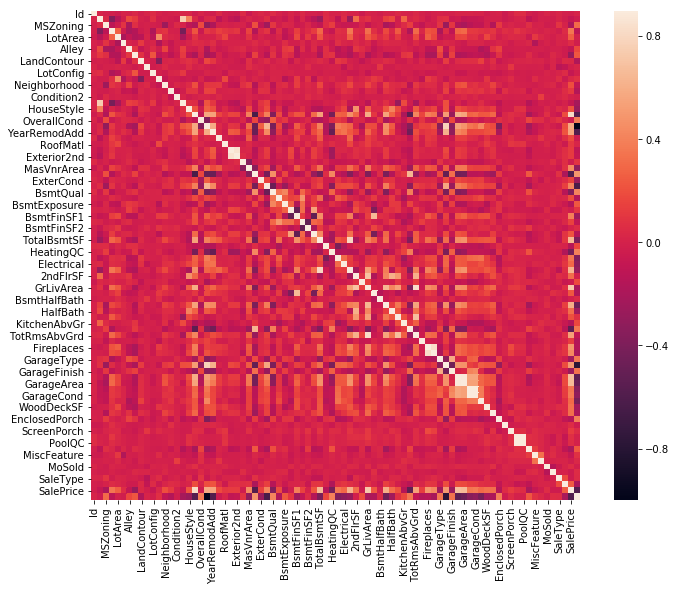

In [147]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)



# Cell Report 

1. Heatmap and the most Correlated Features with the Target variable were represented with the Correlation
   Matrix.
2. Some Features that have a high Correlation(>0.8):
4. These are some important observations which can be exploited later on.



## 2.4 Checking Missing Values

In [148]:
#handling missing value in the dataset
data_na = (train.isnull().sum() / len(train)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : data_na})
missing_data.head()

,Missing Ratio



## Cell report

1. counted null value of train data and divided by the length of train and multiply with 100 to get % value.
2. In Descending order, create a dataframe to show 30 missing ratio.
3. There is no missing ratio.Now I can go to the further step.


In [149]:
def outlier_data(df):
    
    m = loop.LocalOutlierProbability(df).fit()
    scores = m.local_outlier_probabilities
    #print(scores)
    df['OutlierScores'] = scores
    df = df[df.OutlierScores<0.05]
    return df

In [150]:
train = outlier_data(train)

In [151]:
train.shape

(1362, 83)

In [152]:
y = train['SalePrice']
x = train.loc[:,(train.columns !='SalePrice')&(train.columns !='Id')&(train.columns !='OutlierScores')]


# Cell Report

1. Making a outlier_data function to check the probability of outlier value
2. create a new column 'OutlierScore' which can contain outlier value.
3. If the outlier value over 0.05 , It will be removed.
1. Based on the investigation shown above,'Id', 'saleprice', 'outlierscore' columns were dropped as it would be 'x' data.
2. To take only 'SalePrice' column it create 'y'.


## 2.5 Scaling and Normalize 

In [153]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
#x = normalize(x)
y = np.log(y)


In [154]:
X_train,X_test,y_train,y_test = train_test_split(x,y)

In [155]:
X_train.shape

(1021, 80)

In [156]:
test_x = test.loc[:,(test.columns !='Id')]
test_x = scaler.transform(test_x)


In [157]:
X_train.shape

(1021, 80)

In [158]:
feature_size = X_train.shape[1]


# Cell Report

1. Fit x and normalize y
2. split the value into the  train and test
3. Check the shape of train and test to confirm the equality for build a model.



# 3. Model (Neural Network)

In [159]:

last_layer =1

FH = (feature_size+last_layer)//2
SH = (FH+last_layer)//2
TH = (SH+last_layer)//2
FoH = (TH+last_layer)//2
FiH = (FoH+last_layer)//2
print(FH, SH, TH, FoH, FiH)

40 20 10 5 3


# Cell report


#### Determining the number of node in a hidden layer: Thumb Rule


A Thumb Rule recommended by Geoff Hinton was applied for choosing the best number of Hidden Layers. Number of Neurons on each Layer was tuned according to the Thumb Rule that says, 'Number of
Neurons on each Layer should be somewhere between the size of the input and output layer, potentially the mean'.

There is no hard and fast rule.we have some rule of thumb for approximation.
First Hidden (FH) layer number is calculating by the sum of feature size and last layer, then divided by 2 to get the hidden layer number.

Second Hidden layer Number is calculating by the sum of First Hidden layer number  and last layer number , then divide by 2. 

In this way calculated 3rd, 4th and 5th hidden layer number.


## 3.1 Hyperparameter Tuning

In [160]:
Reg = MLPRegressor(hidden_layer_sizes=(FH,SH,TH),max_iter=1000,verbose=False)
activation_options = ['identity','tanh','logistic','relu']
solver_options = ['lbfgs','adam']
alpha_options = [0.0001]
tol_options = [0.0001]
learning_rate_options = ['constant','adaptive']
param_grid_MLPReg = dict(activation = activation_options,
                       solver = solver_options,
                       alpha = alpha_options,
                       learning_rate = learning_rate_options,
                        tol=tol_options)
gridMLPReg = GridSearchCV(Reg,param_grid=param_grid_MLPReg,cv=10,scoring ='r2',verbose=2)




# Cell Report

1. A Model was represented with Neural Network. Scikit Learn's ANN was used for this Traditional
   Model. Hyper Parameters were tuned.
   
2. A 10 Fold Cross Validation was run on the Train Data and the Average Accuracy Score(R2 Score) was shown.
2. 'mean_squared_logarithmic_error' was used as loss function.

3. This is a Basic Model. So, Hyperparameters and Layers were chosen by rule of thumb.



In [161]:
gridMLPReg.fit(x,y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.4s
[CV] activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.2s
[CV] activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.1s
[CV] activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.2s
[CV] activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.2s
[CV] activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.1s
[CV] activation=identity, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=identity, alpha=0.0001, learning_rate=

[CV]  activation=tanh, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.3s
[CV] activation=tanh, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=tanh, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.3s
[CV] activation=tanh, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=tanh, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.3s
[CV] activation=tanh, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=tanh, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.3s
[CV] activation=tanh, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 
[CV]  activation=tanh, alpha=0.0001, learning_rate=constant, solver=lbfgs, tol=0.0001 -   0.5s
[CV] activation=tanh, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 
[CV]  activation=tanh, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   0.7s
[C

[CV]  activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   0.5s
[CV] activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 
[CV]  activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   0.4s
[CV] activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 
[CV]  activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   0.6s
[CV] activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 
[CV]  activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   0.5s
[CV] activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 
[CV]  activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   0.7s
[CV] activation=logistic, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 
[CV]  activation=logistic, alpha=0.0001, learning_rate=constant, 

[CV]  activation=relu, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   1.0s
[CV] activation=relu, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 
[CV]  activation=relu, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   0.8s
[CV] activation=relu, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 
[CV]  activation=relu, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   1.3s
[CV] activation=relu, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 
[CV]  activation=relu, alpha=0.0001, learning_rate=constant, solver=adam, tol=0.0001 -   0.6s
[CV] activation=relu, alpha=0.0001, learning_rate=adaptive, solver=lbfgs, tol=0.0001 
[CV]  activation=relu, alpha=0.0001, learning_rate=adaptive, solver=lbfgs, tol=0.0001 -   0.2s
[CV] activation=relu, alpha=0.0001, learning_rate=adaptive, solver=lbfgs, tol=0.0001 
[CV]  activation=relu, alpha=0.0001, learning_rate=adaptive, solver=lbfgs, tol=0.0001 -   0.3s
[CV] ac

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.4min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'tanh', 'logistic', 'relu'], 'solver': ['lbfgs', 'adam'], 'alpha': [0.0001], 'learning_rate': ['constant', 'adaptive'], 'tol': [0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=2)

## 3.2 Summary of Hyperparameter Tuning

In [162]:
gridMLPReg.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'learning_rate': 'adaptive',
 'solver': 'lbfgs',
 'tol': 0.0001}


#  Cell report

1. Grid Search was run and best Optimizer was found.
2. First the Train Data was fitted to the Model and get the best score.
3. find out the best combination of the model.


# 4.Result

In [163]:
gridMLPReg.best_score_

0.8047987008833195

In [164]:
test_y = pd.DataFrame()
test_y['Id'] = test['Id']
test_y_grid = pd.DataFrame()
test_y_grid['Id'] = test['Id']

In [165]:
test_y_grid['SalePrice'] = np.exp(gridMLPReg.predict(test_x))



# Cell Report

1. By using the best model get the best score.
1. create a new data frame.there is two parameter 'Id' and 'saleprice'
2. Then all the Train Data were fitted to the Model and Predictions were Inverse log1p Transformed



## 4.1 Sample Submission for kaggle

In [166]:
test_y_grid.to_csv('submission_grid-1.csv',index=0)




## 4.2 kaggle Score



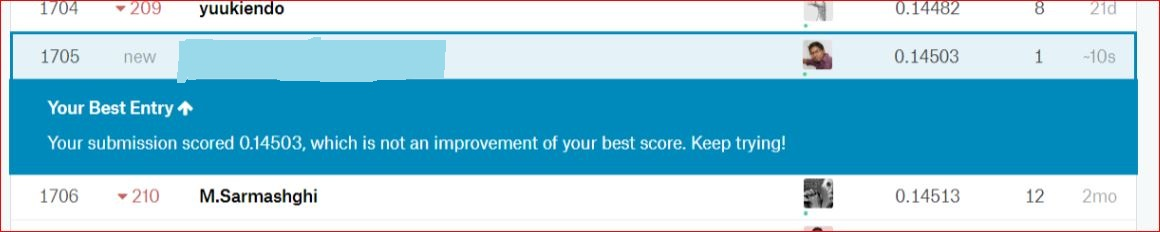

In [167]:
from IPython.display import Image
Image('Kaggle-Score.JPG')

### kaggle score is 0.14503



# Discussion

1. In this work, I didn't work with deep learning models. That might help increaseing the accuracy more.

2. Feature Engineering, Outlier Removal, Skewness Reduction and Hyper Parameter Tuning had great impact
   on the improvement of the Final Score.
   
3. Neural Network has an Inherent Tendency to overfit. Further improvement of the Final Score is deteriorated
   due to this contingency.





# 5. Conclusion


1. From the project we did, we can say that ANN without any parameter selection provides the best result with a kaggle 
   score of 0.14503 However, with proper tuning of neural network size and nodes, the result may vary. 
   
3. If I droup some column which is less correlation to the SalePrice, the accuracy may improve.
   
4. Also different algorithms such as XGBoost might provide higher accuracy in a regressor problem.
